In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import the training data from the file
df = pd.DataFrame(pd.read_csv("D3.csv"))

In [365]:
x1 = df.values[:, 0] # get input values from first column
x2 = df.values[:, 1] # get input values from second column
x3 = df.values[:, 2] # get input values from third column
y = df.values[:, 3] # get output values from fourth column (dependent var)
m = len(y) # Number of training examples
print("Total number of data points:", m)

#Viewing all the data points:
# plt.scatter(x1,y, color='red',marker= '+',label= 'First Variable')
# plt.scatter(x2,y, color='blue',marker= '+',label= 'Second Variable')
# plt.scatter(x3,y, color='green',marker= '+',label= 'Third Variable')
# plt.grid()
# plt.rcParams["figure.figsize"] = (10,6)
# plt.xlabel('x3')
# plt.ylabel('y')
# plt.title('Scatter plot of third independant variable vs. dependant variable')
# plt.legend()

Total number of data points: 99


In [366]:
#Reshaping and adding a column of ones to represent the "variable" multiplied against theta0 for each input
X_0 = np.ones((m, 1))

X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)

xCom = np.hstack((X_0, X_1, X_2, X_3))
x1 = np.hstack((X_0, X_1))
x2 = np.hstack((X_0, X_2))
x3 = np.hstack((X_0, X_3))
#print(xCom)

In [367]:
#Credit for the following compute_cost function:
#Author: Hamed Tabkhi
#Institution: University of North Carolina at Charlotte, ECE dept.
#Accessed on: 9/17/2021
#From: "LinearRegression.pdf"
 
def compute_cost(X, y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [368]:
#Credit for the following gradient_descent function:
#Author: Hamed Tabkhi
#Institution: University of North Carolina at Charlotte, ECE dept.
#Accessed on: 9/17/2021
#From: "LinearRegression.pdf"

def gradient_descent(X, y, theta, alpha, iterations):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
 """
 cost_history = np.zeros(iterations)
 for i in range(iterations):
     predictions = X.dot(theta)
     errors = np.subtract(predictions, y)
     sum_delta = (alpha / m) * X.transpose().dot(errors);
     theta = theta - sum_delta;
     cost_history[i] = compute_cost(X, y, theta)
 return theta, cost_history

In [431]:
#My version of the gradient_descent to accomadate a threshold instead of a fixed amount of iterations.
def new_gradient_descent(X, y, theta, alpha, iterations_limit, threshold):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations_limit: Sets a maximum on how many iterations can be performed. Scalar value.
    threshold: Stops the descent once cost falls below this values. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    iterations: the total iterations of gradient descent accumulated. Scalar Values
    """
    iterations = 0
    deviation = 10000000 #Assume enourmous deviation(cost) to begin with
    cost_history = np.empty([0,1])
    
    while iterations<iterations_limit and deviation>threshold:
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history = np.vstack((cost_history, compute_cost(X, y, theta)))
        
        iterations+=1
        deviation = compute_cost(X, y, theta)
    
    cost_history = cost_history.transpose()

    return theta, cost_history, iterations

Final value of thetas for the first set = [ 5.75752967 -1.97114532]
cost_history for the first variable = [[5.4416155  5.40304386 5.36697031 ... 0.98927932 0.98925005 0.98922091]]
Final number of iterations = 1500 



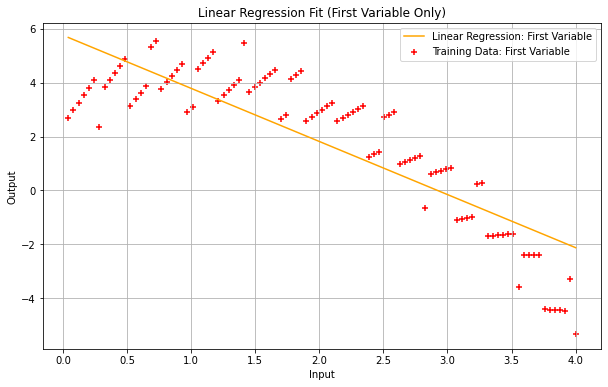

In [432]:
#Question 1:
#Discovering the model for the first explanatory variable:
theta = np.zeros(2)
iterations_lim = 1500
alpha = 0.01
threshold = .001

theta1, cost_history1, iterate1 = new_gradient_descent(x1, y, theta, alpha, iterations_lim, threshold)
print('Final value of thetas for the first set =', theta1)
print('cost_history for the first variable =', cost_history1)
print('Final number of iterations =', iterate1, "\n")
#print(len(cost_history01.transpose()))

# Plotting the first variable of the training data with its regression line
plt.scatter(x1[:,1], y, color='red', marker= '+', label= 'Training Data: First Variable')
plt.plot(x1[:,1],x1.dot(theta1), color='orange', label='Linear Regression: First Variable')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Fit (First Variable Only)')
plt.legend()

Text(0.5, 1.0, 'Loss vs. Iterations for 1st Explanatory Variable')

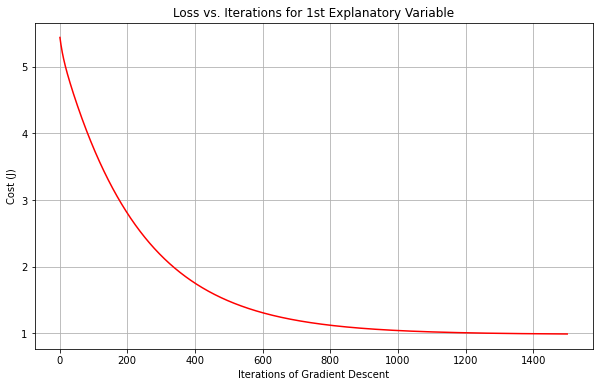

In [433]:
# Plotting loss over the iteration for the first explanatory variable
plt.plot(range(1, iterate1 + 1), cost_history1.transpose(), color='red',)
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations of Gradient Descent')
plt.ylabel('Cost (J)')
plt.title('Loss vs. Iterations for 1st Explanatory Variable')

Final value of thetas for the second set = [0.7392744 0.5453018]
cost_history for the second variable = [[5.2669085  5.07623409 4.90799786 ... 3.6201926  3.62019244 3.62019228]]
Final number of iterations = 1500 



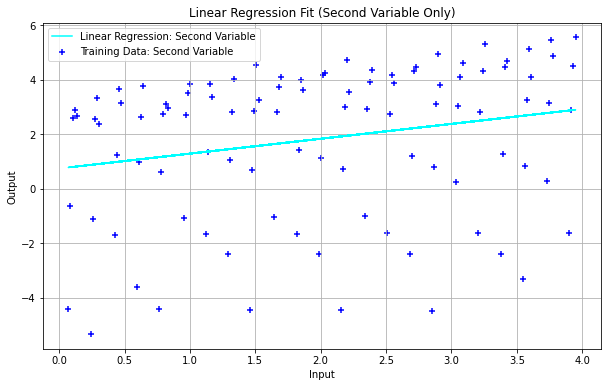

In [434]:
# Plotting the second variable of the training data with its regression line
theta2, cost_history2, iterate2 = new_gradient_descent(x2, y, theta, alpha, iterations_lim, threshold)
print('Final value of thetas for the second set =', theta2)
print('cost_history for the second variable =', cost_history2)
print('Final number of iterations =', iterate2, "\n")
#print(len(cost_history01.transpose()))

plt.scatter(x2[:,1], y, color='blue', marker= '+', label= 'Training Data: Second Variable')
plt.plot(x2[:,1],x2.dot(theta2), color='cyan', label='Linear Regression: Second Variable')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Fit (Second Variable Only)')
plt.legend()

Text(0.5, 1.0, 'Loss vs. Iterations for 2nd Explanatory Variable')

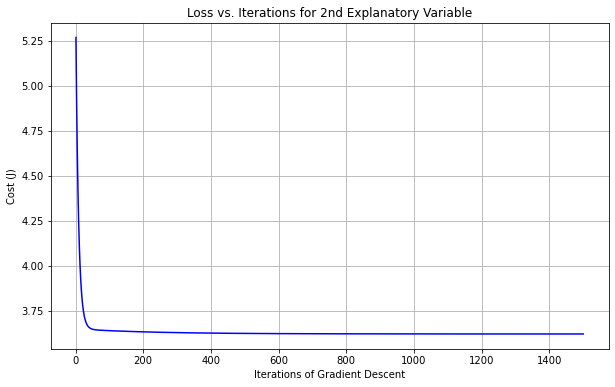

In [435]:
# Plotting loss over the iteration for the second explanatory variable
plt.plot(range(1, iterate2 + 1), cost_history2.transpose(), color='blue',)
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations of Gradient Descent')
plt.ylabel('Cost (J)')
plt.title('Loss vs. Iterations for 2nd Explanatory Variable')

Final value of thetas for the third set = [ 2.71943299 -0.46300206]
cost_history for the third variable = [[5.366643   5.26340773 5.17178032 ... 3.65144217 3.65143712 3.6514321 ]]
Final number of iterations = 1500 



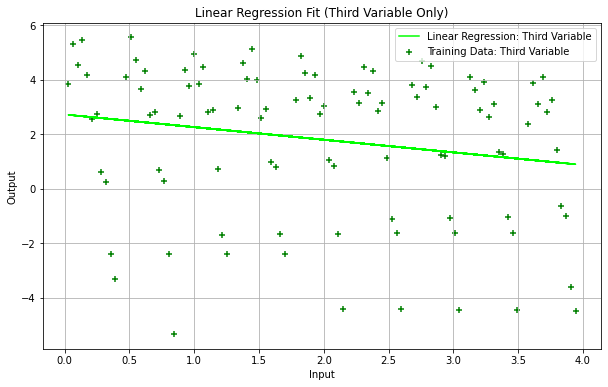

In [436]:
# Plotting the third variable of the training data with its regression line
theta3, cost_history3, iterate3 = new_gradient_descent(x3, y, theta, alpha, iterations_lim, threshold)
print('Final value of thetas for the third set =', theta3)
print('cost_history for the third variable =', cost_history3)
print('Final number of iterations =', iterate3, "\n")
#print(len(cost_history01.transpose()))

plt.scatter(x3[:,1], y, color='green', marker= '+', label= 'Training Data: Third Variable')
plt.plot(x3[:,1],x3.dot(theta3), color='lime', label='Linear Regression: Third Variable')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Fit (Third Variable Only)')
plt.legend()

Text(0.5, 1.0, 'Loss vs. Iterations for 3rd Explanatory Variable')

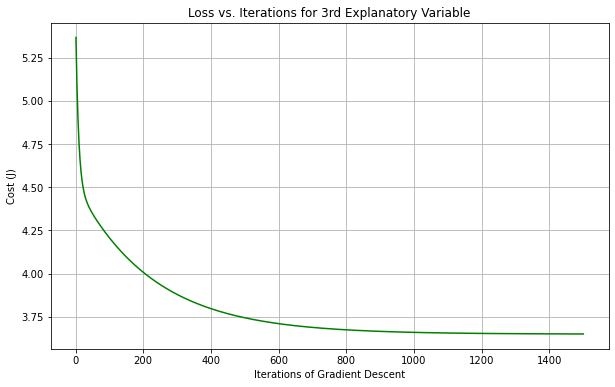

In [437]:
# Plotting loss over the iteration for the first explanatory variable
plt.plot(range(1, iterate3 + 1), cost_history3.transpose(), color='green',)
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations of Gradient Descent')
plt.ylabel('Cost (J)')
plt.title('Loss vs. Iterations for 3rd Explanatory Variable')

In [438]:
# Computing and comparing the cost for each explanatory variable.
cost1 = compute_cost(x1, y, theta1)
cost2 = compute_cost(x2, y, theta2)
cost3 = compute_cost(x3, y, theta3)
print('The cost for the calculated values of theta_0 and theta_1 for the 1st variable =', cost1, "\n")
print('The cost for the calculated values of theta_0 and theta_1 for the 2nd variable =', cost2, "\n")
print('The cost for the calculated values of theta_0 and theta_1 for the 3rd variable =', cost3, "\n")
lowCost = min(cost1,cost2,cost3)
if lowCost == cost1:
    winner = "1st explanatory variable."
elif lowCost == cost2:
    winner = "2nd explanatory variable."
else:
    winner = "3rd explanatory variable."
print("The lowest cost is = ", lowCost, "from the", winner)

The cost for the calculated values of theta_0 and theta_1 for the 1st variable = 0.9892209063359478 

The cost for the calculated values of theta_0 and theta_1 for the 2nd variable = 3.6201922772011357 

The cost for the calculated values of theta_0 and theta_1 for the 3rd variable = 3.6514320959887274 

The lowest cost is =  0.9892209063359478 from the 1st explanatory variable.


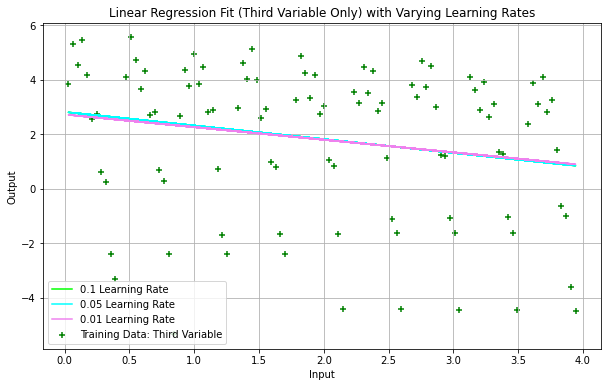

In [439]:
#Testing various alpha values with the 3rd explanatory variable and graphing the results.
theta3a1, cost_history3a1, iterate3a1 = new_gradient_descent(x3, y, theta, 0.1, 1500, 0.001)
theta3a2, cost_history3a2, iterate3a2 = new_gradient_descent(x3, y, theta, 0.05, 1500, 0.001)
theta3a3, cost_history3a3, iterate3a3 = new_gradient_descent(x3, y, theta, 0.01, 1500, 0.001)

plt.scatter(x3[:,1], y, color='green', marker= '+', label= 'Training Data: Third Variable')
plt.plot(x3[:,1],x3.dot(theta3a1), color='lime', label='0.1 Learning Rate')
plt.plot(x3[:,1],x3.dot(theta3a2), color='cyan', label='0.05 Learning Rate')
plt.plot(x3[:,1],x3.dot(theta3a3), color='violet', label='0.01 Learning Rate')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Fit (Third Variable Only) with Varying Learning Rates')
plt.legend()

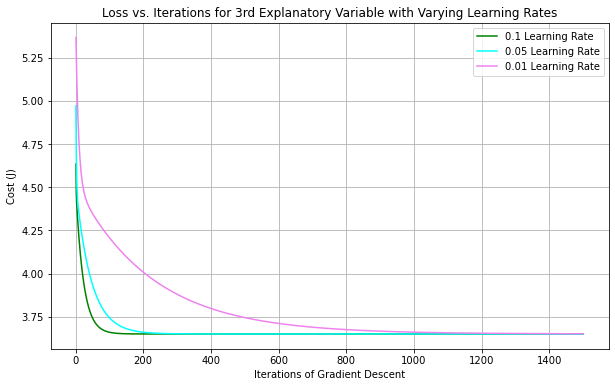

In [440]:
# Plotting loss over the iteration for the third explanatory variable with varying learning rates. 
plt.plot(range(1, iterate3a1 + 1), cost_history3a1.transpose(), color='green',label='0.1 Learning Rate')
plt.plot(range(1, iterate3a2 + 1), cost_history3a2.transpose(), color='cyan',label='0.05 Learning Rate')
plt.plot(range(1, iterate3a3 + 1), cost_history3a3.transpose(), color='violet',label='0.01 Learning Rate')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations of Gradient Descent')
plt.ylabel('Cost (J)')
plt.title('Loss vs. Iterations for 3rd Explanatory Variable with Varying Learning Rates')
plt.legend()

Final value of thetas for the entire set = [ 5.41374693 -2.04203017  0.56122181 -0.2921286 ]
cost_history for the entire set = [[4.1450758  3.54646843 3.16253942 ... 0.70818787 0.70818787 0.70818787]] 

Final number of iterations = 1500 



Text(0.5, 1.0, 'Loss vs. Iterations')

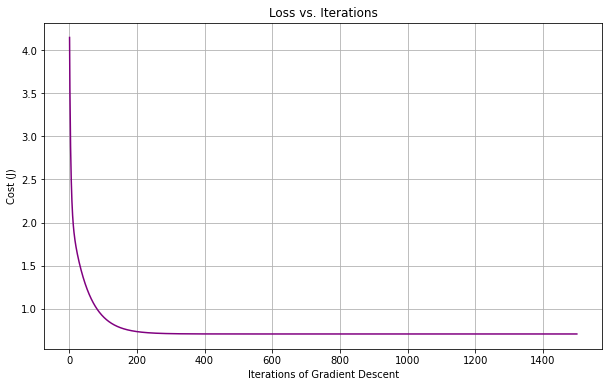

In [441]:
#Question 2: All variables included in the gradient descent.
theta = np.zeros(4)
iterations_lim = 1500;
alpha = 0.1;
threshold = .0001

theta, cost_history, iterate = new_gradient_descent(xCom, y, theta, alpha, iterations_lim, threshold)

print('Final value of thetas for the entire set =', theta)
print('cost_history for the entire set =', cost_history, "\n")
print('Final number of iterations =', iterate, "\n")

# Plotting loss over the iteration for the regression line considering all variables.
plt.plot(range(1, iterate + 1), cost_history.transpose(), color='purple',)
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations of Gradient Descent')
plt.ylabel('Cost (J)')
plt.title('Loss vs. Iterations')

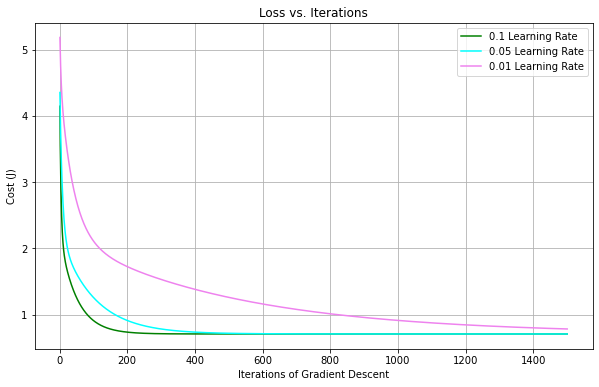

In [442]:
#Testing various training rates impact on the model:
thetaa = np.zeros(4)
iterations_lima = 1500;
thresholda = 0.0001
thetaa1, cost_historya1, iteratea1 = new_gradient_descent(xCom, y, thetaa, 0.1, iterations_lima, thresholda)
thetaa2, cost_historya2, iteratea2 = new_gradient_descent(xCom, y, thetaa, 0.05, iterations_lima, thresholda)
thetaa3, cost_historya3, iteratea3 = new_gradient_descent(xCom, y, thetaa, 0.01, iterations_lima, thresholda)

# Plotting loss over the iteration for the regression line considering all variables.
plt.plot(range(1, iteratea1 + 1), cost_historya1.transpose(), color='green',label='0.1 Learning Rate')
plt.plot(range(1, iteratea2 + 1), cost_historya2.transpose(), color='cyan',label='0.05 Learning Rate')
plt.plot(range(1, iteratea3 + 1), cost_historya3.transpose(), color='violet',label='0.01 Learning Rate')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations of Gradient Descent')
plt.ylabel('Cost (J)')
plt.title('Loss vs. Iterations')
plt.legend()

In [443]:
#Testing the model's prediction for set values.
print("The theta values are:",theta, "\n")
test1 = np.array([1,1,1,1])
test2 = np.array([1,2,0,4])
test3 = np.array([1,3,2,1])

prediction1 = theta.dot(test1.transpose())
prediction2 = theta.dot(test2.transpose())
prediction3 = theta.dot(test3.transpose())
print("The model predicted output for the (1,1,1) test input is: ",prediction1,"\n")
print("The model predicted output for the (2,0,4) test input is: ",prediction2,"\n")
print("The model predicted output for the (3,2,1) test input is: ",prediction3,"\n")

The theta values are: [ 5.41374693 -2.04203017  0.56122181 -0.2921286 ] 

The model predicted output for the (1,1,1) test input is:  3.640809979168586 

The model predicted output for the (2,0,4) test input is:  0.16117220225655737 

The model predicted output for the (3,2,1) test input is:  0.1179714561932278 

